In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
print(tf.__version__)

0.12.0-rc0


In [1]:
!wget http://www.cs.cornell.edu/~shuochen/lme/dataset.tar.gz

--2016-12-10 13:15:47--  http://www.cs.cornell.edu/~shuochen/lme/dataset.tar.gz
Resolving www.cs.cornell.edu... 132.236.207.20
Connecting to www.cs.cornell.edu|132.236.207.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15344424 (15M) [application/x-gzip]
Saving to: 'dataset.tar.gz.1'

dataset.tar.gz.1    100%[=====================>]  14.63M  1.74MB/s   in 8.8s   

2016-12-10 13:15:57 (1.66 MB/s) - 'dataset.tar.gz.1' saved [15344424/15344424]



In [2]:
! tar -xvf dataset.tar.gz

x dataset/
x dataset/._.DS_Store
x dataset/.DS_Store
x dataset/README
x dataset/yes_big/
x dataset/yes_complete/
x dataset/yes_small/
x dataset/yes_small/song_hash.txt
x dataset/yes_small/tag_hash.txt
x dataset/yes_small/tags.txt
x dataset/yes_small/test.txt
x dataset/yes_small/train.txt
x dataset/yes_complete/song_hash.txt
x dataset/yes_complete/tag_hash.txt
x dataset/yes_complete/tags.txt
x dataset/yes_complete/test.txt
x dataset/yes_complete/train.txt
x dataset/yes_big/song_hash.txt
x dataset/yes_big/tag_hash.txt
x dataset/yes_big/tags.txt
x dataset/yes_big/test.txt
x dataset/yes_big/train.txt


In [3]:
! head dataset/yes_small/train.txt

17430147 17277121 17767569 17352501 17567841 17650342 17572001 17646522 17451245 17745865 17133389 17287001 17133341 17160601 17107661 16633361 7077770 7013472 17643402 7047578 17767561 17555081 17554981 10815267 17302141 16523121 17142821 17650802 17555241 17352241 17644582 17164634 15074181 17254751 17123135 16535221 17169441 17528447 17200602 17547025 17013761 17142041 16478882 16654041 17746182 16753901 17169561 16942241 12359576 16090261 14631082 16423266 16425108 17323409 13702101 10435380 16535423 16461401 16456961 11666787 7002139 14118161 16425361 10158218 7046560 7059246 11287909 17451282 10288058 7057680 17203881 16007034 16577741 16235221 17174914 17430256 16665721 16229922 17617381 17164628 17191021 11565226 17360921 16640141 11688495 10361522 10197305 8418317 10606295 17716841 17005562 16524988 7065280 16304421 14103121 10517723 16624701 7045465 10993962 10298799 15464661 10715565 17144437 15710161 17357081 7970096 13176921 16401706 7011347 10326374 14697423 16283551 9131

In [4]:
! head dataset/yes_small/song_hash.txt

0	Gucci Time (w\/ Swizz Beatz)	Gucci Mane
1	Aston Martin Music (w\/ Drake & Chrisette Michelle)	Rick Ross
2	Get Back Up (w\/ Chris Brown)	T.I.
3	Hot Toddy (w\/ Jay-Z & Ester Dean)	Usher
4	Whip My Hair	Willow
5	Down On Me (w\/ 50 Cent)	Jeremih
6	Black And Yellow	Wiz Khalifa
7	Blowing Me Kisses	Soulja Boy
8	Lay It Down	Lloyd
9	Who's That Chick	Rihanna


In [3]:
songs = pd.read_csv('dataset/yes_small/song_hash.txt', sep='\t', names=['song_id', 'title', 'artist'])\
    .set_index('song_id', drop=False)\
    .assign(artist_id=lambda df: df.artist.astype('category').cat.codes)

print(songs.shape)
songs.head(5)

(3168, 4)


,song_id,title,artist,artist_id
song_id,,,,
0,0,Gucci Time (w\/ Swizz Beatz),Gucci Mane,474
1,1,Aston Martin Music (w\/ Drake & Chrisette Mich...,Rick Ross,960
2,2,Get Back Up (w\/ Chris Brown),T.I.,1098
3,3,Hot Toddy (w\/ Jay-Z & Ester Dean),Usher,1264
4,4,Whip My Hair,Willow,1304


In [118]:
artists = songs.groupby('artist_id').first()[['artist']].reset_index()

artist_songs_played = songs.artist.loc[playlist_songs.song_id].to_frame('artist')\
    .groupby('artist').size()\
    .sort_values(ascending=False).to_frame('n_songs_played')

artists = pd.merge(artists, artist_songs_played.reset_index(), on='artist')
artists.head()

,artist_id,artist,n_songs_played
0,0,-,93
1,1,.38 Special,47
2,2,10 Years,152
3,3,2Pac,146
4,4,3 Doors Down,274


In [6]:
FIRST_FAULTY_PLAYLIST = 2
playlists = pd.read_csv('dataset/yes_small/train.txt', header=None, names=['songs'])\
    .assign(songs=lambda df: df.songs.str.split(' ').apply(lambda ids: list(map(int, filter(None, ids)))))\
    .iloc[FIRST_FAULTY_PLAYLIST:,:]

print('{} playlists for a total of {} songs'.format(playlists.shape[0], playlists.songs.apply(len).sum()))
playlists.head()
playlists.head()

41480 playlists for a total of 175911 songs


,songs
2,"[0, 1, 2, 3, 4, 5, 6, 7, 8]"
3,"[9, 10, 11]"
4,"[12, 13, 14, 15]"
5,"[16, 17, 18]"
6,[19]


In [7]:
FIRST_FAULTY_PLAYLIST = 2
test_playlists = pd.read_csv('dataset/yes_small/test.txt', header=None, names=['songs'])\
    .assign(songs=lambda df: df.songs.str.split(' ').apply(lambda ids: list(map(int, filter(None, ids)))))\
    .iloc[FIRST_FAULTY_PLAYLIST:,:]

print('{} playlists for a total of {} songs'.format(test_playlists.shape[0], test_playlists.songs.apply(len).sum()))
test_playlists.head()

389728 playlists for a total of 1581007 songs


,songs
2,"[3, 30, 38, 11, 39, 22, 40]"
3,"[12, 41, 42]"
4,"[43, 36]"
5,[44]
6,[4]


In [8]:
from itertools import chain

playlist_songs = pd.DataFrame.from_records(
    data=chain.from_iterable([(playlist_id, position, song_id) for position, song_id in enumerate(song_ids)] for playlist_id, (song_ids,) in playlists.iterrows()),
    columns=['playlist_id', 'position', 'song_id'])

playlist_songs.shape

(175911, 3)

,playlist_id,position,song_id,title,artist,artist_id
0,4,0,12,All I Wants Is You (w\/ J Cole),Miguel,797
1,4,1,13,Champagne Life,Ne-Yo,832
2,4,2,14,Find Your Love,Drake,341
3,4,3,15,Your Love,Nicki Minaj,844


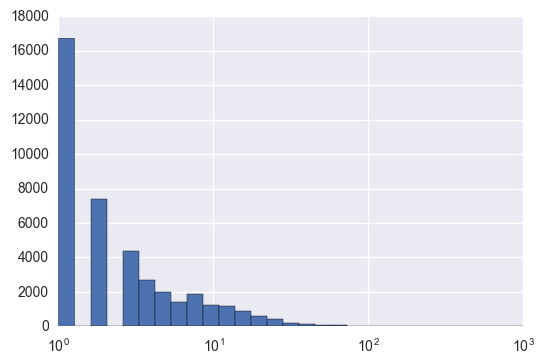

In [9]:
plt.hist(playlist_songs.groupby('playlist_id').size(), bins=np.logspace(0, 3, 30))
plt.xscale('log')

pd.merge(
    playlist_songs.query('playlist_id == 4'),
    songs,
    on='song_id')

In [10]:
songs.song_id.describe()

count    3168.000000
mean     1583.500000
std       914.667153
min         0.000000
25%       791.750000
50%      1583.500000
75%      2375.250000
max      3167.000000
Name: song_id, dtype: float64

In [11]:
playlist_songs.song_id.describe()

count    175911.000000
mean       1532.231151
std        1016.879762
min           0.000000
25%         541.000000
50%        1579.000000
75%        2505.000000
max        3167.000000
Name: song_id, dtype: float64

In [35]:
from itertools import permutations, chain

song_ids = playlist_songs.query('playlist_id == 3').song_id.values

def artist_skip_grams(song_ids):
    song_artist_ids = songs.artist_id.loc[song_ids].values
    return [(a1, a2) for a1, a2 in permutations(song_artist_ids, 2) if a1 != a2]

print(song_ids)
print(artist_skip_grams(song_ids))

[ 9 10 11]
[(965, 394), (965, 1264), (394, 965), (394, 1264), (1264, 965), (1264, 394)]


In [36]:
from itertools import islice, repeat

class PlaylistToArtistSkipGrams:

    def __init__(self, playlists=playlists, loops=1):
        all_artist_skip_grams = chain.from_iterable(map(artist_skip_grams, playlists.songs.values))
        self.all_artist_skip_grams_iterable = chain.from_iterable(repeat(all_artist_skip_grams, loops))
        
    def next_batch(self, batch_size):
        next_skip_grams = list(islice(self.all_artist_skip_grams_iterable, batch_size))
        return np.array(next_skip_grams, dtype=np.int32) 

skipGramGenerator = PlaylistToArtistSkipGrams()

In [26]:
%timeit sum(1 for _ in PlaylistToArtistSkipGrams().all_artist_skip_grams_iterable)

1 loop, best of 3: 20.5 s per loop


In [37]:
PlaylistToArtistSkipGrams(playlists=playlists.loc[[3]], loops=1).next_batch(100)

array([[ 965,  394],
       [ 965, 1264],
       [ 394,  965],
       [ 394, 1264],
       [1264,  965],
       [1264,  394]], dtype=int32)

In [39]:
PlaylistToArtistSkipGrams(playlists=test_playlists.loc[[3]], loops=1).next_batch(100)

array([[ 797, 1101],
       [ 797, 1101],
       [1101,  797],
       [1101,  797]], dtype=int32)

In [15]:
playlist_songs.playlist_id.describe()

count    175911.000000
mean      20671.629466
std       11897.679314
min           2.000000
25%       10341.000000
50%       20807.000000
75%       31225.000000
max       41481.000000
Name: playlist_id, dtype: float64

In [170]:
N_SONGS = songs.song_id.max() + 1
N_ARTISTS = songs.artist_id.max() + 1

class Song2Vec:
    def __init__(self, n_entities, dimensionality=50, batch_size=None):
        
        with tf.name_scope('input_embeddings'):
            input_embeddings = tf.Variable(tf.random_normal([n_entities, dimensionality], 
                                                           stddev=0.01, mean=0), name='input')
            tf.histogram_summary('input_embeddings', input_embeddings)

        with tf.name_scope('output_embeddings'):
            output_embeddings = tf.Variable(tf.random_normal([n_entities, dimensionality], stddev=0.01, mean=0), name='output')
            tf.histogram_summary('output_embeddings', output_embeddings)

        with tf.name_scope('output_bias'):
            output_biases = tf.Variable(tf.random_normal([n_entities], stddev=0.01, mean=0), name='output_bias')
            tf.histogram_summary('output_biases', output_biases)
        
        self.n_entities = n_entities
        self.output_biases = output_biases
        self.input_embeddings = input_embeddings
        self.output_embeddings = output_embeddings
    
        self.input_song_ids = tf.placeholder(
            tf.int32, shape=[batch_size], name='input_song_ids')
        self.output_song_ids = tf.placeholder(
            tf.int32, shape=[batch_size], name='output_song_ids')

    def input_to_all_output_logits(self):
        """
        The architecture is made of:
         * input nodes for the user_id, and associated weights or embeddings V_u
         * internal weights W_i and biases b_i for each items
        """
        return self.output_biases + tf.matmul(
                tf.nn.embedding_lookup(self.input_embeddings, self.input_song_ids),
                tf.transpose(self.output_embeddings), name='input_to_all_output_logits')

    def sampled_loss(self):
        with tf.name_scope('loss'):
            sample_losses = tf.nn.sampled_softmax_loss(
                biases=self.output_biases,
                inputs=tf.nn.embedding_lookup(self.input_embeddings, self.input_song_ids),
                labels=tf.reshape(self.output_song_ids, (-1, 1)),
                weights=self.output_embeddings,
                num_classes=self.n_entities,
                num_sampled=10, num_true=1)
            return tf.reduce_mean(sample_losses)
        
    def exact_loss(self):
        with tf.name_scope('loss'):
            cross_entropy_sum = tf.reduce_mean(
                tf.nn.sparse_softmax_cross_entropy_with_logits(
                    logits=self.input_to_all_output_logits(),
                    labels=self.output_song_ids))
        return cross_entropy_sum

In [171]:
import datetime as dt
import os

from tensorflow.contrib.tensorboard.plugins import projector

LEARNING_RATE = 0.005
BATCH_SIZE = 10000
N_ITER = 100
LOG_DIR = '/tmp/tf_logs'

with tf.Graph().as_default():
    model = Song2Vec(n_entities=N_ARTISTS, dimensionality=20)
    loss = model.exact_loss()    #.sampled_loss()
    
    tf.scalar_summary('batch_loss', loss)
    summary = tf.merge_all_summaries()
    test_summary = tf.scalar_summary('test_loss', loss)
    train_step = tf.train.AdamOptimizer(LEARNING_RATE).minimize(loss)
    
    test_generator = PlaylistToArtistSkipGrams(playlists=test_playlists, loops=100)
    skip_grams_generator = PlaylistToArtistSkipGrams(loops=100)
    
    def perform_step(step, summary_writer):
        batch_input_and_output_ids = skip_grams_generator.next_batch(BATCH_SIZE)
        if batch_input_and_output_ids is None or len(batch_input_and_output_ids) == 0:
            print(batch_input_and_output_ids)
            return
        _, loss_value, summary_value = sess.run(
            fetches=[train_step, loss, summary], 
            feed_dict={
                model.input_song_ids: batch_input_and_output_ids[:, 0],
                model.output_song_ids: batch_input_and_output_ids[:, 1]
            })
        summary_writer.add_summary(summary_value, global_step=step)
        
        if step% 10 == 0:
            test_input_and_output_ids = test_generator.next_batch(BATCH_SIZE * 10)
            test_loss_value, test_summary_value = sess.run(
            fetches=[loss, test_summary], 
            feed_dict={
                model.input_song_ids: test_input_and_output_ids[:, 0],
                model.output_song_ids: test_input_and_output_ids[:, 1]
            })

            print('step {step}, batch_loss = {loss_value:.2f}, test_loss = {test_loss_value:.2f}'.format(**locals()))
            summary_writer.add_summary(test_summary_value, global_step=step)
        summary_writer.flush()

    with tf.Session() as sess:

        summary_writer = tf.train.SummaryWriter(
            os.path.join(LOG_DIR,'{:%Y%m%d%H%M%S}'.format(dt.datetime.now())),
            sess.graph)

        sess.run(tf.global_variables_initializer())
        
        for step in range(N_ITER):
            perform_step(step, summary_writer)
        
        input_embeddings = model.input_embeddings.eval()
        output_embeddings = model.output_embeddings.eval()
        
        saver = tf.train.Saver()
        saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"), step)
        save_embeddings_metadata(model, summary_writer)

step 0, batch_loss = 7.19, test_loss = 7.18
step 10, batch_loss = 7.12, test_loss = 7.05
step 20, batch_loss = 6.88, test_loss = 6.43
step 30, batch_loss = 5.79, test_loss = 6.57
step 40, batch_loss = 6.66, test_loss = 5.40
step 50, batch_loss = 5.13, test_loss = 5.10
step 60, batch_loss = 5.75, test_loss = 5.08
step 70, batch_loss = 4.85, test_loss = 4.62
step 80, batch_loss = 4.23, test_loss = 4.91
step 90, batch_loss = 4.71, test_loss = 4.85


In [175]:
def save_embeddings_metadata(model, summary_writer):
    """ From https://www.tensorflow.org/versions/r0.12/how_tos/embedding_viz/index.html#tensorboard-embedding-visualization
    """
    embeddings_metadata_path = os.path.join(LOG_DIR, 'artist_embeddings.tsv')
    artists.to_csv(embeddings_metadata_path, sep='\t')

    config = projector.ProjectorConfig()
    for embeddings_variable in [model.output_embeddings, model.input_embeddings]:
        embedding = config.embeddings.add()
        embedding.tensor_name = embeddings_variable.name
        embedding.metadata_path = embeddings_metadata_path
    
    projector.visualize_embeddings(summary_writer, config)

In [176]:
pd.DataFrame(input_embeddings).to_csv(os.path.join(LOG_DIR, "input_embeddings.tsv"), sep='\t', index=None, header=None)
pd.DataFrame(output_embeddings).to_csv(os.path.join(LOG_DIR, "output_embeddings.tsv"), sep='\t', index=None, header=None)

In [177]:
from IPython.core.display import HTML, display
import pandas as pd

pd.set_option('display.width', 1000)

from scipy import spatial

def embeddings_to_distances(embeddings):
    item_item_distances = pd.DataFrame(
        index=embeddings.index,
        columns=embeddings.index,
        data=spatial.distance.squareform(spatial.distance.pdist(embeddings.values, metric='cosine'))
    )
    return item_item_distances

def topn_most_similar(item_id, topn, item_item_distances):
    candidate_distances = item_item_distances.loc[item_id]
    return candidate_distances.sort_values().iloc[1:(topn+1)].to_frame('distance')

def display_items(from_id, to_items_df, items_metadata):
    display(HTML(items_metadata.loc[[from_id]].to_html()))
    display(HTML(to_items_df.join(items_metadata).to_html()))
    
def display_topn_most_similar(item_id, distances, topn, items_metadata):
    most_similar = topn_most_similar(item_id, topn, distances)
    display_items(item_id, most_similar, items_metadata)

In [186]:
distances = embeddings_to_distances(pd.DataFrame(data=input_embeddings))
distances = embeddings_to_distances(pd.DataFrame(data=output_embeddings))


In [187]:
ABBA = 19
display_topn_most_similar(item_id=ABBA, distances=distances, topn=5, items_metadata=artists)

,artist_id,artist,n_songs_played
19,19,Abba,39


,distance,artist_id,artist,n_songs_played
500,0.001528,500,Howard Jones,21
1231,0.002347,1231,Tom Cochrane,42
825,0.002453,825,Natalie Cole,33
530,0.002601,530,James Taylor,51
1135,0.002664,1135,The Cardigans,25


In [188]:
WITNEY = 1300
display_topn_most_similar(item_id=WITNEY, distances=distances, topn=5, items_metadata=artists)

,artist_id,artist,n_songs_played
1300,1300,Whitney Houston,21


,distance,artist_id,artist,n_songs_played
528,0.000611,528,James Fortune & Fiya,131
842,0.000625,842,Nick Colionne,21
317,0.000642,317,Destroy Rebuild Until God Shows,28
1245,0.000661,1245,Trans-Siberian Orchestra,20
106,0.000695,106,Benny Mardones,18


In [189]:
TWOPAC = 3
display_topn_most_similar(item_id=TWOPAC, distances=distances, topn=5, items_metadata=artists)

,artist_id,artist,n_songs_played
3,3,2Pac,146


,distance,artist_id,artist,n_songs_played
80,0.017574,80,Baby Bash,132
1096,0.018483,1096,T-Pain,129
695,0.020199,695,Lil' Jon & The Eastside Boyz,110
1008,0.020839,1008,Sean Kingston,164
78,0.022342,78,B.o.B,216


In [190]:
BEATLES = 1129
#output_distances = embeddings_to_distances(pd.DataFrame(data=output_embeddings))
display_topn_most_similar(item_id=BEATLES, distances=distances, topn=10, items_metadata=artists)

,artist_id,artist,n_songs_played
1129,1129,The Beatles,105


,distance,artist_id,artist,n_songs_played
1093,0.003398,1093,Supertramp,88
1153,0.003440,1153,The Electric Light Orchestra,83
453,0.003442,453,Golden Earring,55
1148,0.003498,1148,The Doobie Brothers,187
1163,0.003850,1163,The Guess Who,59
82,0.004126,82,Bachman-Turner Overdrive,104
1152,0.004438,1152,The Edgar Winter Group,52
1239,0.004529,1239,Toto,41
1257,0.004609,1257,Twisted Sister,33
135,0.004657,135,Blue Oyster Cult,70


In [191]:
ROLLING = 1190
display_topn_most_similar(item_id=ROLLING, distances=distances, topn=10, items_metadata=artists)

,artist_id,artist,n_songs_played
1190,1190,The Rolling Stones,375


,distance,artist_id,artist,n_songs_played
311,0.008190,311,Def Leppard,418
984,0.015012,984,Rush,226
1170,0.015749,1170,The Jimi Hendrix Experience,237
928,0.018642,928,Queen,378
1132,0.024281,1132,The Black Crowes,156
1111,0.025158,1111,Temple Of The Dog,76
608,0.025585,608,Judas Priest,138
759,0.027252,759,Marilyn Manson,101
401,0.029367,401,Filter,67
285,0.029893,285,Danzig,71
